In [49]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import balanced_accuracy_score
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
#Read in the CSV and read in the data
df = pd.read_csv("../Resources/neighborhood_tier_final.csv")

In [3]:
df.head()

,postal_code,State,City,CountyName,2021,total_restaurants,avg_stars,total_reviews,BubbleTea,Coffee&Tea,...,stars_1.0_ratio,ratio_stars_1.0,ratio_stars_1.5,ratio_stars_2.0,ratio_stars_2.5,ratio_stars_3.0,ratio_stars_3.5,ratio_stars_4.0,ratio_stars_4.5,ratio_stars_5.0
0,37013,TN,Nashville,Davidson County,291881,83,3.096386,4257.0,0.0,4.0,...,0.036145,0.036145,0.108434,0.144578,0.108434,0.132530,0.084337,0.192771,0.180723,0.012048
1,37211,TN,Nashville,Davidson County,336572,182,3.491758,12761.0,2.0,12.0,...,0.027473,0.027473,0.060440,0.087912,0.049451,0.142857,0.126374,0.214286,0.219780,0.071429
2,37221,TN,Nashville,Davidson County,396261,69,3.217391,6690.0,0.0,3.0,...,0.014493,0.014493,0.057971,0.115942,0.101449,0.159420,0.231884,0.188406,0.130435,0.000000
3,37209,TN,Nashville,Davidson County,440662,147,3.772109,16663.0,0.0,10.0,...,0.006803,0.006803,0.034014,0.061224,0.034014,0.074830,0.149660,0.292517,0.292517,0.054422
4,37076,TN,Nashville,Davidson County,324646,81,3.228395,4994.0,0.0,4.0,...,0.012346,0.012346,0.098765,0.074074,0.135802,0.172840,0.185185,0.135802,0.111111,0.074074


In [4]:
#drop unneeded columns
df = df.drop(columns=['postal_code', 'State', 'City', 'CountyName', "avg_stars", '2021', "Average County House Price", "Neighborhood Indicator"])

In [5]:
df.head()

,total_restaurants,total_reviews,BubbleTea,Coffee&Tea,Bakeries,Burgers,FastFood,Sandwiches,IceCream&FrozenYogurt,Vietnamese,...,stars_1.0_ratio,ratio_stars_1.0,ratio_stars_1.5,ratio_stars_2.0,ratio_stars_2.5,ratio_stars_3.0,ratio_stars_3.5,ratio_stars_4.0,ratio_stars_4.5,ratio_stars_5.0
0,83,4257.0,0.0,4.0,1.0,14.0,22.0,13.0,3.0,0.0,...,0.036145,0.036145,0.108434,0.144578,0.108434,0.132530,0.084337,0.192771,0.180723,0.012048
1,182,12761.0,2.0,12.0,5.0,23.0,37.0,26.0,4.0,3.0,...,0.027473,0.027473,0.060440,0.087912,0.049451,0.142857,0.126374,0.214286,0.219780,0.071429
2,69,6690.0,0.0,3.0,3.0,14.0,20.0,13.0,4.0,0.0,...,0.014493,0.014493,0.057971,0.115942,0.101449,0.159420,0.231884,0.188406,0.130435,0.000000
3,147,16663.0,0.0,10.0,2.0,24.0,19.0,18.0,7.0,5.0,...,0.006803,0.006803,0.034014,0.061224,0.034014,0.074830,0.149660,0.292517,0.292517,0.054422
4,81,4994.0,0.0,4.0,3.0,12.0,23.0,15.0,1.0,0.0,...,0.012346,0.012346,0.098765,0.074074,0.135802,0.172840,0.185185,0.135802,0.111111,0.074074


In [6]:
df.shape

(760, 440)

# Create Scaled Training and Test data

In [7]:
# Create the features
X = df.drop(columns='Neighborhood Tiers')
X.head()

,total_restaurants,total_reviews,BubbleTea,Coffee&Tea,Bakeries,Burgers,FastFood,Sandwiches,IceCream&FrozenYogurt,Vietnamese,...,stars_1.0_ratio,ratio_stars_1.0,ratio_stars_1.5,ratio_stars_2.0,ratio_stars_2.5,ratio_stars_3.0,ratio_stars_3.5,ratio_stars_4.0,ratio_stars_4.5,ratio_stars_5.0
0,83,4257.0,0.0,4.0,1.0,14.0,22.0,13.0,3.0,0.0,...,0.036145,0.036145,0.108434,0.144578,0.108434,0.132530,0.084337,0.192771,0.180723,0.012048
1,182,12761.0,2.0,12.0,5.0,23.0,37.0,26.0,4.0,3.0,...,0.027473,0.027473,0.060440,0.087912,0.049451,0.142857,0.126374,0.214286,0.219780,0.071429
2,69,6690.0,0.0,3.0,3.0,14.0,20.0,13.0,4.0,0.0,...,0.014493,0.014493,0.057971,0.115942,0.101449,0.159420,0.231884,0.188406,0.130435,0.000000
3,147,16663.0,0.0,10.0,2.0,24.0,19.0,18.0,7.0,5.0,...,0.006803,0.006803,0.034014,0.061224,0.034014,0.074830,0.149660,0.292517,0.292517,0.054422
4,81,4994.0,0.0,4.0,3.0,12.0,23.0,15.0,1.0,0.0,...,0.012346,0.012346,0.098765,0.074074,0.135802,0.172840,0.185185,0.135802,0.111111,0.074074


In [8]:
X.describe()

,total_restaurants,total_reviews,BubbleTea,Coffee&Tea,Bakeries,Burgers,FastFood,Sandwiches,IceCream&FrozenYogurt,Vietnamese,...,stars_1.0_ratio,ratio_stars_1.0,ratio_stars_1.5,ratio_stars_2.0,ratio_stars_2.5,ratio_stars_3.0,ratio_stars_3.5,ratio_stars_4.0,ratio_stars_4.5,ratio_stars_5.0
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,...,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,43.455263,4701.144737,0.257895,3.680263,1.655263,5.346053,6.855263,7.697368,1.013158,0.535526,...,0.007052,0.007052,0.036556,0.064652,0.087822,0.135304,0.202670,0.250759,0.171935,0.043251
std,44.674411,10576.018090,0.757442,4.562450,2.225638,5.550106,7.915402,7.799057,1.309672,1.286927,...,0.028518,0.028518,0.051257,0.089229,0.090884,0.131939,0.130834,0.159497,0.160958,0.106833
min,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,457.750000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.019808,0.068690,0.134295,0.166667,0.090404,0.000000
50%,30.500000,1574.500000,0.000000,2.000000,1.000000,4.000000,4.000000,5.000000,1.000000,0.000000,...,0.000000,0.000000,0.018519,0.048465,0.076923,0.120784,0.200000,0.244173,0.150000,0.016001
75%,63.250000,5084.750000,0.000000,5.000000,2.000000,8.000000,10.000000,11.000000,2.000000,1.000000,...,0.000000,0.000000,0.055556,0.092593,0.127153,0.166667,0.262002,0.321950,0.219231,0.050158
max,361.000000,176931.000000,10.000000,41.000000,19.000000,36.000000,44.000000,54.000000,8.000000,15.000000,...,0.500000,0.500000,0.384615,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#Create target variable
y = df['Neighborhood Tiers']
y.head()

0    3
1    2
2    2
3    2
4    3
Name: Neighborhood Tiers, dtype: int64

In [10]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
print(f"y_train: {Counter(y_train)}")
print(f"y_test: {Counter(y_test)}")


y_train: Counter({2: 284, 1: 144, 3: 142})
y_test: Counter({2: 85, 3: 59, 1: 46})


In [11]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
X_train_scaled[:, 2]

array([ 0.8602081 , -0.34747322, -0.34747322, -0.34747322,  0.8602081 ,
       -0.34747322, -0.34747322,  0.8602081 , -0.34747322, -0.34747322,
       -0.34747322, -0.34747322, -0.34747322, -0.34747322, -0.34747322,
       -0.34747322, -0.34747322, -0.34747322, -0.34747322, -0.34747322,
       -0.34747322,  0.8602081 ,  0.8602081 , -0.34747322, -0.34747322,
       -0.34747322,  0.8602081 , -0.34747322,  2.06788943, -0.34747322,
       -0.34747322, -0.34747322, -0.34747322, -0.34747322, -0.34747322,
       -0.34747322, -0.34747322, -0.34747322, -0.34747322,  0.8602081 ,
       -0.34747322, -0.34747322, -0.34747322, -0.34747322,  0.8602081 ,
       -0.34747322, -0.34747322,  0.8602081 , -0.34747322, -0.34747322,
       -0.34747322, -0.34747322,  0.8602081 , -0.34747322, -0.34747322,
       -0.34747322,  2.06788943, -0.34747322, -0.34747322, -0.34747322,
       -0.34747322, -0.34747322,  4.48325209, -0.34747322, -0.34747322,
       -0.34747322, -0.34747322, -0.34747322, -0.34747322, -0.34

In [13]:
X_test_scaled[:,2]

array([-0.34747322, -0.34747322, -0.34747322,  0.8602081 , -0.34747322,
       -0.34747322, -0.34747322,  0.8602081 , -0.34747322, -0.34747322,
       -0.34747322, -0.34747322, -0.34747322, -0.34747322, -0.34747322,
       -0.34747322, -0.34747322, -0.34747322, -0.34747322, -0.34747322,
        0.8602081 , -0.34747322, -0.34747322, -0.34747322, -0.34747322,
       -0.34747322, -0.34747322, -0.34747322, -0.34747322, -0.34747322,
        0.8602081 , -0.34747322, -0.34747322, -0.34747322, -0.34747322,
       -0.34747322,  3.27557076, -0.34747322, -0.34747322, -0.34747322,
        0.8602081 , -0.34747322, -0.34747322, -0.34747322, -0.34747322,
       -0.34747322, -0.34747322, -0.34747322,  0.8602081 , -0.34747322,
       -0.34747322,  0.8602081 , -0.34747322, -0.34747322, -0.34747322,
        0.8602081 ,  3.27557076, -0.34747322, -0.34747322,  0.8602081 ,
       -0.34747322, -0.34747322, -0.34747322, -0.34747322, -0.34747322,
       -0.34747322, -0.34747322, -0.34747322, -0.34747322, -0.34

# Create a logistic regression model

In [14]:
# Logistic Regression
classifier_LR = LogisticRegression(solver='lbfgs', random_state=1, max_iter = 200)
classifier_LR

LogisticRegression(max_iter=200, random_state=1)

In [15]:
# Train the data
classifier_LR.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [16]:
# Predict outcomes for test data set
y_pred_LR = classifier_LR.predict(X_test_scaled)
pd.DataFrame({"Prediction": y_pred_LR, "Actual": y_test}).head(20)

,Prediction,Actual
470,2,1
733,3,2
546,2,1
442,1,1
693,3,3
353,1,3
759,1,2
202,2,2
602,2,2
153,3,2


In [17]:
#Calculate the Balanced Accuracy score
y_pred = classifier_LR.predict(X_test_scaled)
acc_LR = balanced_accuracy_score(y_test, y_pred_LR)
acc_LR

0.4309275073330732

In [18]:
#calculate Mean Squared Error
mse_LR = mean_squared_error(y_test, y_pred_LR)
mse_LR

0.8421052631578947

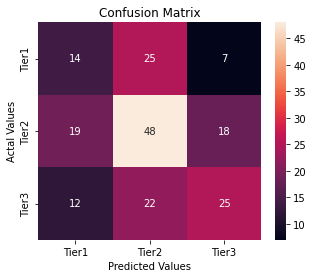

In [19]:
# Display the confusion matrix
cm_LR = confusion_matrix(y_test, y_pred_LR)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_LR = pd.DataFrame(cm_LR,
                     index = ['Tier1','Tier2','Tier3'], 
                     columns = ['Tier1','Tier2','Tier3'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_LR, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [20]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           1       0.31      0.30      0.31        46
           2       0.51      0.56      0.53        85
           3       0.50      0.42      0.46        59

    accuracy                           0.46       190
   macro avg       0.44      0.43      0.43       190
weighted avg       0.46      0.46      0.46       190



# Create Balanced Random Forest Classifier

In [21]:
# Resample the training data with the BalancedRandomForestClassifier
model_RF = BalancedRandomForestClassifier(n_estimators=10000, random_state=1) 
model_RF.fit(X_train_scaled, y_train)

BalancedRandomForestClassifier(n_estimators=10000, random_state=1)

In [22]:
# Calculated the balanced accuracy score
y_pred_RF = model_RF.predict(X_test_scaled)

balanced_accuracy_score(y_test, y_pred_RF)


0.4790006791220541

In [23]:
#calculate Mean Squared Error
mse_RF = mean_squared_error(y_test, y_pred_RF)
mse_RF

0.8631578947368421

In [24]:
pd.DataFrame({"Prediction": y_pred_RF, "Actual": y_test}).head(20)

,Prediction,Actual
470,1,1
733,2,2
546,1,1
442,1,1
693,2,3
353,2,3
759,1,2
202,2,2
602,3,2
153,3,2


In [25]:
# Calculate feature importance in the Random Forest model.
importances = model_RF.feature_importances_
importances

array([1.14556697e-02, 1.97992874e-02, 1.06928669e-03, 6.92643837e-03,
       4.17208065e-03, 8.19467785e-03, 9.43572488e-03, 8.29616493e-03,
       3.82898282e-03, 1.63697260e-03, 3.55413417e-03, 8.45830750e-03,
       5.17445675e-03, 6.45213336e-03, 5.17914570e-03, 5.95648835e-03,
       1.63653399e-03, 3.86130931e-03, 4.56491535e-03, 1.03678333e-02,
       8.61232952e-03, 9.26053076e-03, 1.32147833e-03, 1.84532317e-03,
       3.71829013e-03, 1.05849004e-02, 9.35910481e-03, 6.62200779e-03,
       2.32003963e-03, 1.51840132e-03, 2.22746714e-03, 4.81051982e-03,
       4.61700602e-03, 4.86356744e-03, 1.90579306e-03, 2.45956101e-03,
       6.22201887e-03, 2.37734868e-03, 9.51456025e-03, 3.19619587e-03,
       1.81422078e-04, 3.73715532e-03, 5.67413946e-03, 3.79463054e-04,
       2.72221273e-03, 2.56487548e-03, 4.17300288e-03, 2.66806240e-03,
       2.81678640e-03, 2.91067793e-03, 1.31163879e-03, 2.02932280e-03,
       3.75648700e-03, 1.59187099e-03, 8.79700923e-04, 7.29017334e-04,
      

In [26]:
# We can sort the features by their importance.
sorted(zip(model_RF.feature_importances_, X.columns), reverse=True)

[(0.01979928737529636, 'total_reviews'),
 (0.01800818443130374, 'Pizza_stars'),
 (0.015692931789534292, 'ratio_stars_3.5'),
 (0.015534867077367903, 'ratio_stars_4.0'),
 (0.014449048751737142, 'ratio_stars_2.5'),
 (0.014309986458552108, 'num_rest_categories'),
 (0.01341431928761632, 'ratio_stars_2.0'),
 (0.012784629113739926, 'American(Traditional)_stars'),
 (0.012224038557030411, 'Italian_stars'),
 (0.012147026881863207, 'ratio_stars_3.0'),
 (0.011883645350643573, 'American(New)_stars'),
 (0.011765091820930447, 'Sandwiches_stars'),
 (0.01145566968621924, 'total_restaurants'),
 (0.011402147737377036, 'FastFood_stars'),
 (0.011346342130868341, 'total_stars'),
 (0.010665704722083178, 'Burgers_stars'),
 (0.010584900375737127, 'American(New)'),
 (0.01057111262213932, 'ratio_stars_4.5'),
 (0.010367833335464817, 'Italian'),
 (0.010169412739667434, 'Coffee&Tea_stars'),
 (0.009668561666247041, 'Bars_stars'),
 (0.009514560249568645, 'Mexican'),
 (0.009466624501078639, 'ChickenWings_stars'),
 (0.

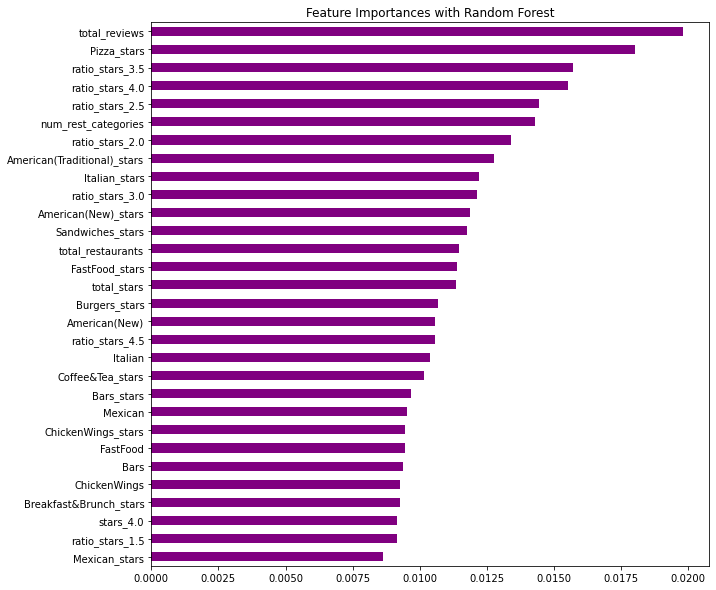

In [30]:
# Plot influential features based on Random Forest model:
influential_features = pd.Series(model_RF.feature_importances_, X.columns)
influential_features.nlargest(30).sort_values().plot(kind='barh', color='purple', figsize=(10,10))
plt.title('Feature Importances with Random Forest');

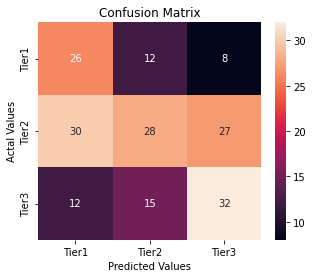

In [27]:
# Display the confusion matrix
cm_RF = confusion_matrix(y_test, y_pred_RF)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_RF = pd.DataFrame(cm_RF,
                     index = ['Tier1','Tier2','Tier3'], 
                     columns = ['Tier1','Tier2','Tier3'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_RF, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [28]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           1       0.38      0.57      0.46        46
           2       0.51      0.33      0.40        85
           3       0.48      0.54      0.51        59

    accuracy                           0.45       190
   macro avg       0.46      0.48      0.45       190
weighted avg       0.47      0.45      0.45       190



# Create Easy Ensemble AdaBoost Classifier

In [32]:
# Train the EasyEnsembleClassifier
model_Ada = EasyEnsembleClassifier(n_estimators=100, random_state=1) 
model_Ada.fit(X_train_scaled, y_train)

EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [33]:
# Calculated the balanced accuracy score
y_pred_Ada = model_Ada.predict(X_test_scaled)

balanced_accuracy_score(y_test, y_pred_Ada)

0.5046541534815843

In [34]:
pd.DataFrame({"Prediction": y_pred_Ada, "Actual": y_test}).head(10)

,Prediction,Actual
470,1,1
733,3,2
546,1,1
442,1,1
693,2,3
353,2,3
759,2,2
202,3,2
602,2,2
153,3,2


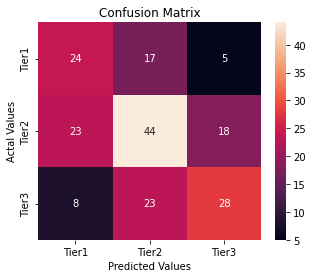

In [35]:
# Display the confusion matrix
cm_Ada = confusion_matrix(y_test, y_pred_Ada)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_Ada = pd.DataFrame(cm_Ada,
                     index = ['Tier1','Tier2','Tier3'], 
                     columns = ['Tier1','Tier2','Tier3'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_Ada, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [36]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_Ada))

              precision    recall  f1-score   support

           1       0.44      0.52      0.48        46
           2       0.52      0.52      0.52        85
           3       0.55      0.47      0.51        59

    accuracy                           0.51       190
   macro avg       0.50      0.50      0.50       190
weighted avg       0.51      0.51      0.51       190



# Create Gradient Boosting Classifier

In [37]:
# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier_GBC = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)
    # Fit the model
    classifier_GBC.fit(X_train_scaled, y_train)
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier_GBC.score(
            X_train_scaled,
            y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier_GBC.score(
            X_test_scaled,
            y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.549
Accuracy score (validation): 0.437

Learning rate:  0.1
Accuracy score (training): 0.619
Accuracy score (validation): 0.484

Learning rate:  0.25
Accuracy score (training): 0.753
Accuracy score (validation): 0.505

Learning rate:  0.5
Accuracy score (training): 0.847
Accuracy score (validation): 0.474

Learning rate:  0.75
Accuracy score (training): 0.875
Accuracy score (validation): 0.547

Learning rate:  1
Accuracy score (training): 0.902
Accuracy score (validation): 0.516



In [38]:
# Choose a learning rate and create classifier
classifier_GBC = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.75,
                                        max_features=10,
                                        max_depth=5,
                                        random_state=0)

# Fit the model
classifier_GBC.fit(X_train_scaled, y_train)

# Make Prediction
y_pred_GBC = classifier_GBC.predict(X_test_scaled)
pd.DataFrame({"Prediction": y_pred_GBC, "Actual": y_test}).head(20)

,Prediction,Actual
470,1,1
733,2,2
546,1,1
442,2,1
693,2,3
353,2,3
759,2,2
202,3,2
602,2,2
153,3,2


In [39]:
balanced_accuracy_score(y_test, y_pred_GBC)

0.4172338058288902

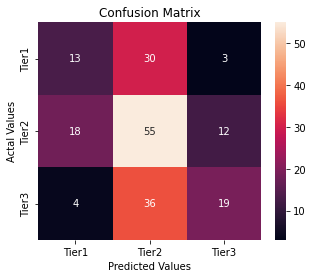

In [40]:
cm_GBC = confusion_matrix(y_test, y_pred_GBC)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_GBC = pd.DataFrame(cm_GBC,
                     index = ['Tier1','Tier2','Tier3'], 
                     columns = ['Tier1','Tier2','Tier3'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_GBC, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [41]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_GBC))


              precision    recall  f1-score   support

           1       0.37      0.28      0.32        46
           2       0.45      0.65      0.53        85
           3       0.56      0.32      0.41        59

    accuracy                           0.46       190
   macro avg       0.46      0.42      0.42       190
weighted avg       0.47      0.46      0.44       190



# Naive Bayes model

In [42]:
from sklearn.naive_bayes import GaussianNB
classifiers_bayes = GaussianNB()
classifiers_bayes.fit(X_train_scaled, y_train)

GaussianNB()

In [43]:
y_pred_bayes  =  classifiers_bayes.predict(X_test_scaled)

In [44]:
pd.DataFrame({"Prediction": y_pred_bayes, "Actual": y_test}).head(20)

,Prediction,Actual
470,3,1
733,3,2
546,1,1
442,3,1
693,3,3
353,3,3
759,3,2
202,3,2
602,3,2
153,3,2


In [45]:
# Calculating the accuracy score
acc_score_bayes = accuracy_score(y_test, y_pred_bayes)
print(f"Accuracy Score : {acc_score_bayes}")

Accuracy Score : 0.34210526315789475


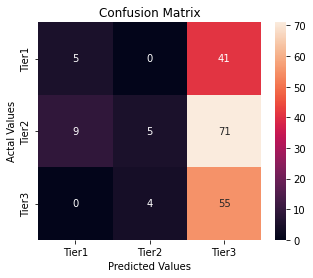

In [46]:
cm_bayes = confusion_matrix(y_test, y_pred_bayes)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_bayes = pd.DataFrame(cm_bayes,
                     index = ['Tier1','Tier2','Tier3'], 
                     columns = ['Tier1','Tier2','Tier3'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_bayes, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [47]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_bayes))

              precision    recall  f1-score   support

           1       0.36      0.11      0.17        46
           2       0.56      0.06      0.11        85
           3       0.33      0.93      0.49        59

    accuracy                           0.34       190
   macro avg       0.41      0.37      0.25       190
weighted avg       0.44      0.34      0.24       190



In [50]:
# print the accuracy score of each model:
print('----------------------------------------')
print('Accuracy')
print('----------------------------------------')
print('Naive Bayes Test Accuracy: ', accuracy_score(y_test, y_pred_bayes)*100,'%')
print('Random Forest Test Accuracy: ', accuracy_score(y_test, y_pred_RF)*100,'%')
print('Adaboost Test Accuracy: ', accuracy_score(y_test, y_pred_Ada)*100,'%')
print('Gradient Boost Test Accuracy: ', accuracy_score(y_test, y_pred_GBC)*100,'%')
print('Logistic Regession Test Accuracy: ', accuracy_score(y_test, y_pred_LR)*100,'%')

# Print the F1 score of each model:
print('\n----------------------------------------')    
print('Weighted F1 Score')
print('----------------------------------------')
print('Naive Bayes F1 Score: ', f1_score(y_test, y_pred_bayes, average='weighted'))
print('Random Forest F1 Score: ', f1_score(y_test, y_pred_RF, average='weighted'))
print('Adaboost F1 Score: ', f1_score(y_test, y_pred_Ada, average='weighted'))
print('Gradient Boost F1 Score: ', f1_score(y_test, y_pred_GBC, average='weighted'))
print('Logistic Regession F1 Score: ', f1_score(y_test, y_pred_LR, average='weighted'))


----------------------------------------
Accuracy
----------------------------------------
Naive Bayes Test Accuracy:  34.21052631578947 %
Random Forest Test Accuracy:  45.26315789473684 %
Adaboost Test Accuracy:  50.526315789473685 %
Gradient Boost Test Accuracy:  45.78947368421053 %
Logistic Regession Test Accuracy:  45.78947368421053 %

----------------------------------------
Weighted F1 Score
----------------------------------------
Naive Bayes F1 Score:  0.23908438956551611
Random Forest F1 Score:  0.44710900057160446
Adaboost F1 Score:  0.50609528844507
Gradient Boost F1 Score:  0.4434805710265734
Logistic Regession F1 Score:  0.45553368247718806
